In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [58]:
benchmark_data = np.array([
    (2, 14,17,0.376027, 4.02335000038147),
    (4, 24161,29801,1.78838, 4.089233875274658),
    (6, 80182,98737,4.04254, 6.108668804168701),
    (8, 168578,207617,6.46067, 8.544336080551147),
    (10, 289253,356288,9.93048, 12.011159896850586),
    (12, 442021,544438,14.4972, 16.66920042037964),
    (14, 627041,772316,18.9057, 21.231324434280396),
    (16, 844115,1039658,23.879, 26.644530534744263),
    (18, 1092901,1346029,31.2715, 33.91261029243469),
    (20, 1373984,1692269,39.795, 42.840527296066284),
])


benchmark_data = np.array([
    (8, 168578,207617,6.50169, 10.178903579711914),
    (28, 2820089,3473351,79.5632, 83.56038522720337),
    (48, 8681185,10688443,236.29, 244.01049637794495),
    (68, 17753282,21857207,464.335, 477.21203994750977),
    (88, 30069866,37020293,793.631, 814.1392734050751),
    (108, 45846781,56442736,1246.18, 1274.9966034889221),
])
benchmark_data = benchmark_data.transpose()
qft_nums, ls_ops, slices, slicing_time, overall_time = benchmark_data

In [83]:
%matplotlib tk

fig, ax2 = plt.subplots()


ax2.plot(qft_nums, slicing_time, '-', color="#b8d5e0", linewidth=3)
ax2.plot(qft_nums, overall_time, '-', color="#657eab", linewidth=3)
ax2.set_ylabel("Time in seconds")
ax2.legend(["Compilation time", "C++ Slicer time"])


ax1 = ax2.twinx()

ax1.plot(qft_nums, ls_ops/1_000_000, 'x', color="green", mew=1, ms=6)
ax1.plot(qft_nums, slices/1_000_000, 'x', color="red", mew=1, ms=6)
ax1.set_ylabel("Number in Milions")
ax1.legend(["Number of LS Instructions", "Number of slices"],loc=9)

ax1.set_xlabel("Number of qubits")
ax1.set_xticks(range(8,109,20))


plt.title("Compiling QFT circuits LSC Python + lsqecc_slicer")


Text(0.5, 1.0, 'Compiling QFT circuits LSC Python + lsqecc_slicer')

In [ ]:
%matplotlib tk

# DARPA Version


fig, ax2 = plt.subplots()


# ax2.plot(qft_nums, slicing_time, '-', color="#b8d5e0")
ax2.plot(qft_nums, overall_time, '-', color="#657eab", linewidth=5)
ax2.set_ylabel("Time in seconds")
ax2.legend(["Compilation time"])


ax1 = ax2.twinx()

ax1.plot(qft_nums, ls_ops/1_000_000, 'x', color="red", mew=2, ms=10)
#ax1.plot(qft_nums, slices/1_000_000, 'o', color="green")
ax1.set_ylabel("Number in Milions")
ax1.legend(["Number of LS Instructions"],loc=1)

ax1.set_xlabel("Number of qubits")
ax1.set_xticks(range(8,109,20))


plt.title("Compiling QFT circuits")

In [3]:

extrapolate = np.linspace(0, 200,10)
a, b, c = np.polyfit(datapoints, n_chars, 2)

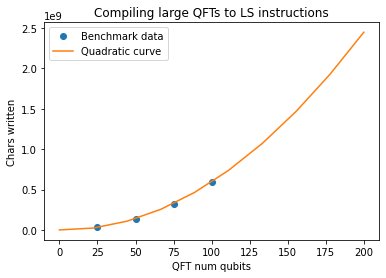

In [4]:
plt.plot(datapoints, n_chars, 'o')
plt.plot(extrapolate, a*extrapolate**2 + b*extrapolate + c)
plt.title("Compiling large QFTs to LS instructions")
plt.ylabel("Chars written")
plt.xlabel("QFT num qubits")
plt.legend(["Benchmark data","Quadratic curve"])

num_qubits=100
Generating qft QASM with AO-Benchmark

Time to generate: 15.138659715652466

Read circuit as Gate based Circuit
Generated 5050 gates (took 0.11664652824401855)

Reduce the Gate based Circuit to Clifford + T
Generated 15066025 gates (took 24.55492877960205)

In [5]:
qft_size = np.array([10,20,30,50]) # skipped 40
runtimes = np.array([
    6.81996,
    22.5154, 
    61.7995,
    238.448 
])

In [6]:
extrapolate2 = np.linspace(0, 100,10)
a, b, c = np.polyfit(qft_size, runtimes, 2)

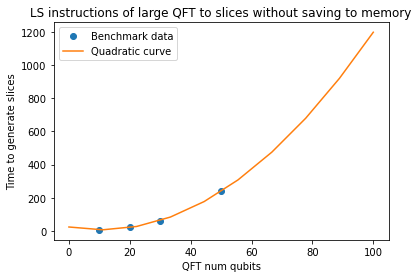

In [8]:
plt.plot(qft_size, runtimes, 'o')
plt.plot(extrapolate2, a*extrapolate2**2 + b*extrapolate2 + c)
plt.title("LS instructions of large QFT to slices without saving to memory")
plt.ylabel("Time to generate slices")
plt.xlabel("QFT num qubits")
plt.legend(["Benchmark data","Quadratic curve"])

```
qft100
Making patch computation
Generated 48138410 slices.
Made patch computation. Took 1238.12s.
```

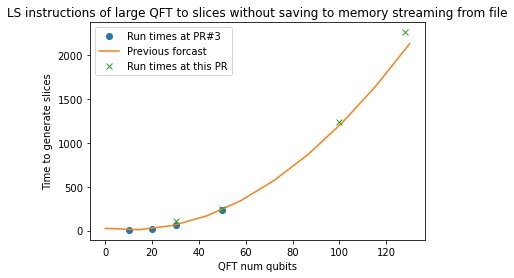

In [19]:
qft_size_shorthand_instruction = np.array([30,50,100,128])
qft_size_shorthand_instruction_runtimes = np.array([
    113.263,
    245.048,
    1238.12,
    2260.87
])

extrapolate2 = np.linspace(0, 130,10)
a, b, c = np.polyfit(qft_size, runtimes, 2)

plt.plot(qft_size, runtimes, 'o')
plt.plot(extrapolate2, a*extrapolate2**2 + b*extrapolate2 + c)
plt.plot(qft_size_shorthand_instruction, qft_size_shorthand_instruction_runtimes,'x')
plt.title("LS instructions of large QFT to slices without saving to memory streaming from file")
plt.ylabel("Time to generate slices in seconds")
plt.xlabel("QFT num qubits")
plt.legend(["Run times at PR#3","Previous forcast","Run times at this PR"])
